#  Капитанов Даниил Сергеевич ИУ5-24М

Вариант 4, Номера задач: 4 	24

Датасет: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

In [65]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [66]:
file_name = 'data1.csv'
file_path = f'{Path(os.getcwd()).parent}//data//{file_name}'
data = pd.read_csv(file_path)

print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group D                some college      standard   
1      male        group D          associate's degree      standard   
2    female        group D                some college  free/reduced   
3      male        group B                some college  free/reduced   
4    female        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          59             70         

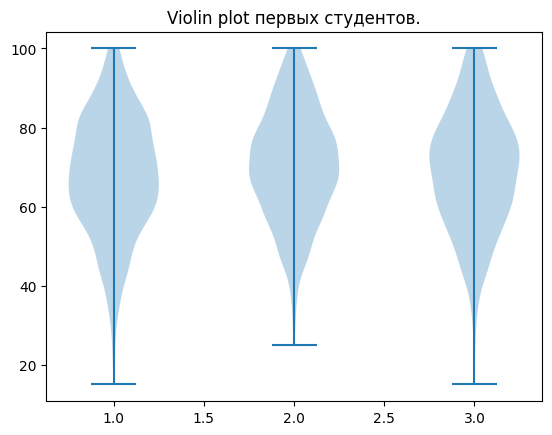

In [67]:
plt.title("Violin plot первых студентов.")

plt.violinplot([data["math score"],
                data["reading score"],
                data["writing score"],
                ])
plt.show()

## Задача 1
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

In [68]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['parental level of education'])

print(data['parental level of education'].unique())
print(np.unique(cat_enc_le))

['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
[0 1 2 3 4 5]


## Задача 2
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.

95% данных располагаются выше 5% квантиля и 95% данных располагаются ниже 95% квантиля. Значения ниже 5% квантиля и выше 95% квантиля можно считать выбросами

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f409362b700>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f409362af20>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f4093628c40>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f40936291e0>}

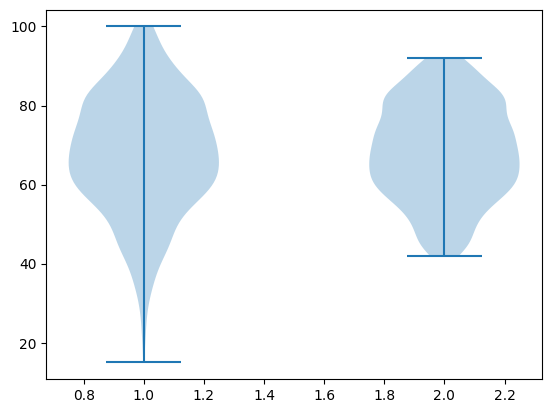

In [69]:
quantile_05 = data["math score"].quantile(0.05)
quantile_95 = data["math score"].quantile(0.95)

outliers_temp = np.where(data["math score"] < quantile_05, True, 
                np.where(data["math score"] > quantile_95, True, False)
                )
data_trimmed = data["math score"].loc[~(outliers_temp)]  
        
plt.violinplot([data["math score"],
                data_trimmed,
                ])